## Oficina de dados abertos do Transferegov
O foco da oficina será na parte das emendas parlamentares chamadas "emendas Pix" que é operacionaliza pelo Transferegov, no módulo de Transferências Especiais. Os dados estão disponibilizados por meio de API de dados abertos.

#Endereço da API: https://docs.api.transferegov.gestao.gov.br/transferenciasespeciais/#/plano_acao_especial/get_plano_acao_especial

## Plano de ação especial
Vamos carregar em uma única tabela todos os dados de Plano de Ação Especial.

## Baixar os dados

In [2]:
import pandas as pd
import requests
from tqdm.notebook import tqdm


In [3]:
LIMIT = 1000
ANO = 2024
URL = "https://api.transferegov.gestao.gov.br/transferenciasespeciais/plano_acao_especial"


In [5]:
content = requests.get(
    URL,
    params={
        "ano_emenda_parlamentar_plano_acao": f"eq.{ANO}",
        "limit": 10,
    },
    headers={
        "Prefer": "count=exact",
    }
)


In [6]:
content.headers
record_count = int(content.headers["Content-Range"].split("/")[-1])
record_count

10934

In [7]:
data = content.json()

In [8]:
df = pd.DataFrame(columns=data[0].keys())

In [9]:
df.columns


Index(['id_plano_acao', 'codigo_plano_acao', 'ano_plano_acao',
       'modalidade_plano_acao', 'situacao_plano_acao',
       'cnpj_beneficiario_plano_acao', 'nome_beneficiario_plano_acao',
       'uf_beneficiario_plano_acao', 'codigo_banco_plano_acao',
       'codigo_situacao_dado_bancario_plano_acao', 'nome_banco_plano_acao',
       'numero_agencia_plano_acao', 'dv_agencia_plano_acao',
       'numero_conta_plano_acao', 'dv_conta_plano_acao',
       'nome_parlamentar_emenda_plano_acao',
       'ano_emenda_parlamentar_plano_acao',
       'codigo_parlamentar_emenda_plano_acao',
       'sequencial_emenda_parlamentar_plano_acao',
       'numero_emenda_parlamentar_plano_acao',
       'codigo_emenda_parlamentar_formatado_plano_acao',
       'codigo_descricao_areas_politicas_publicas_plano_acao',
       'descricao_programacao_orcamentaria_plano_acao',
       'motivo_impedimento_plano_acao', 'valor_custeio_plano_acao',
       'valor_investimento_plano_acao', 'id_programa'],
      dtype='object

In [11]:
pages = []


In [12]:
pages = []
for offset in range(0, record_count, LIMIT):
    content = requests.get(
        URL,
        params={
            "ano_emenda_parlamentar_plano_acao": f"eq.{ANO}",
            "limit": LIMIT,
            "offset": offset,
        },
    )
    pages.extend(content.json())

df = pd.DataFrame(pages)
df

,id_plano_acao,codigo_plano_acao,ano_plano_acao,modalidade_plano_acao,situacao_plano_acao,cnpj_beneficiario_plano_acao,nome_beneficiario_plano_acao,uf_beneficiario_plano_acao,codigo_banco_plano_acao,codigo_situacao_dado_bancario_plano_acao,...,codigo_parlamentar_emenda_plano_acao,sequencial_emenda_parlamentar_plano_acao,numero_emenda_parlamentar_plano_acao,codigo_emenda_parlamentar_formatado_plano_acao,codigo_descricao_areas_politicas_publicas_plano_acao,descricao_programacao_orcamentaria_plano_acao,motivo_impedimento_plano_acao,valor_custeio_plano_acao,valor_investimento_plano_acao,id_programa
0,69182,09032024-069182,2024,Especial,CIENTE,95990131000170,MUNICIPIO DE NOVA ITABERABA,SC,104,4.0,...,2855,22,202428550022,202428550022-Pedro Uczai,15-Urbanismo / 451-Infraestrutura Urbana,None,None,0.0,400000.0,21
1,64478,09032024-064478,2024,Especial,CIENTE,41522186000126,MUNICIPIO DE PASSAGEM FRANCA DO PIAUI,PI,001,4.0,...,4496,1,202444960001,202444960001-Jussara Lima,"13-Cultura / 391-Patrimônio Histórico, Artísti...",None,None,0.0,250000.0,21
2,64487,09032024-064487,2024,Especial,CIENTE,01612590000176,MUNICIPIO DE MILTON BRANDAO,PI,104,4.0,...,4496,1,202444960001,202444960001-Jussara Lima,"6-Segurança Pública / 181-Policiamento , 6-Seg...",None,None,0.0,250000.0,21
3,72493,09032024-072493,2024,Especial,CIENTE,18114264000131,MUNICIPIO DE ESPERA FELIZ,MG,104,4.0,...,3731,9,202437310009,202437310009-Misael Varella,"10-Saúde / 301-Atenção Básica , 10-Saúde / 302...",None,None,0.0,500000.0,21
4,73453,09032024-073453,2024,Especial,CIENTE,18114264000131,MUNICIPIO DE ESPERA FELIZ,MG,104,4.0,...,4057,3,202440570003,202440570003-Pinheirinho,"10-Saúde / 301-Atenção Básica , 10-Saúde / 302...",None,None,0.0,2000000.0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10929,74317,09032024-074317,2024,Especial,CIENTE,75368928000122,MUNICIPIO DE MAMBORE,PR,104,4.0,...,4313,1,202443130001,202443130001-Beto Preto,"15-Urbanismo / 451-Infraestrutura Urbana , 20-...",None,None,0.0,670000.0,21
10930,69119,09032024-069119,2024,Especial,CIENTE,14196042000154,TEOLÂNDIA,BA,104,4.0,...,3906,5,202439060005,202439060005-Alex Santana,8-Assistência Social / 244-Assistência Comunit...,None,None,1530737.0,2469263.0,21
10931,73476,09032024-073476,2024,Especial,CIENTE,18094870000132,MUNICIPIO DE SENHORA DOS REMEDIOS,MG,001,4.0,...,4057,3,202440570003,202440570003-Pinheirinho,"6-Segurança Pública / 181-Policiamento , 6-Seg...",None,None,0.0,500000.0,21
10932,72488,09032024-072488,2024,Especial,CIENTE,46362927000172,MUNICIPIO DE BROTAS,SP,104,4.0,...,3730,11,202437300011,202437300011-Miguel Lombardi,15-Urbanismo / 451-Infraestrutura Urbana,None,None,0.0,300000.0,21


## Análise

In [13]:
df["nome_parlamentar_emenda_plano_acao"].value_counts()

,count
nome_parlamentar_emenda_plano_acao,
Ivete da Silveira,178
Jorge Seif,167
Ciro Nogueira,103
Luis Carlos Heinze,92
Fred Costa,91
...,...
Célia Xakriabá,1
Carlos Jordy,1
Geraldo Resende,1


In [14]:
df["valor_emenda"] = df["valor_custeio_plano_acao"] + df["valor_investimento_plano_acao"]

In [15]:
total_emendas_por_parlamentar = df.groupby("nome_parlamentar_emenda_plano_acao").sum()["valor_emenda"]
total_emendas_por_parlamentar

,valor_emenda
nome_parlamentar_emenda_plano_acao,
Abilio Brunini,8485793.0
Acácio Favacho,16732792.0
Adail Filho,18434456.0
Adilson Barroso,15515785.0
Adolfo Viana,15650000.0
...,...
Zé Silva,13835792.0
Zé Trovão,14935792.0
Zé Vitor,17671585.0


In [16]:
total_emendas_por_parlamentar.sort_values(ascending=False)[:20]


,valor_emenda
nome_parlamentar_emenda_plano_acao,
Jussara Lima,34817425.0
Marcos Rogério,34817425.0
Jayme Campos,34817425.0
Davi Alcolumbre,34815000.0
Otto Alencar,34634850.0
Ciro Nogueira,34634850.0
Giordano,34500000.0
Eliziane Gama,34317425.0
Fernando Farias,34317425.0


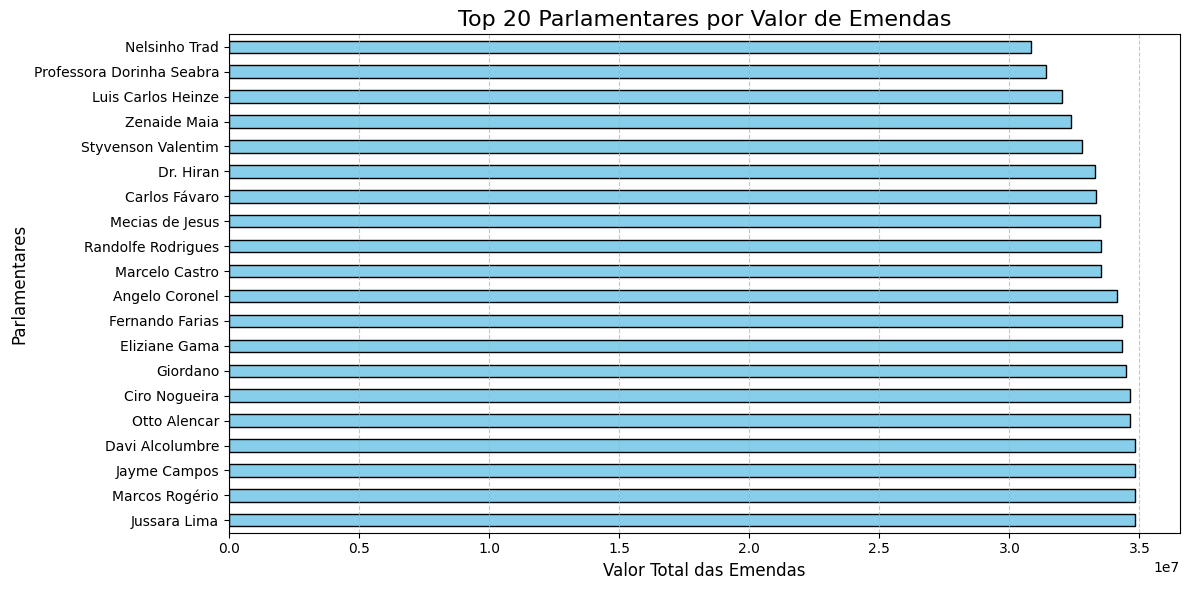

In [17]:
import matplotlib.pyplot as plt

# Ordenar os dados e selecionar os 20 maiores valores
top_20_emendas = total_emendas_por_parlamentar.sort_values(ascending=False)[:20]

# Criar o gráfico de barras horizontais
plt.figure(figsize=(12, 6))
top_20_emendas.plot(kind='barh', color='skyblue', edgecolor='black')

# Adicionar título e rótulos
plt.title('Top 20 Parlamentares por Valor de Emendas', fontsize=16)
plt.xlabel('Valor Total das Emendas', fontsize=12)
plt.ylabel('Parlamentares', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Ajustar layout e exibir
plt.tight_layout()
plt.show()


In [18]:
# URL da API da Câmara para obter partidos
url = "https://dadosabertos.camara.leg.br/api/v2/deputados"

# Requisição dos dados
response = requests.get(url, params={})
data = response.json()["dados"]

# Convertendo para DataFrame
#df_deputados = pd.DataFrame(data)[["id", "nome", "siglaPartido", "siglaUf"]]
df_deputados = pd.DataFrame(data)
df_deputados = df_deputados.rename(columns={"siglaPartido":"partido"})
# Exibindo os primeiros registros
print(df_deputados.head())

       id                                                uri             nome  \
0  220593  https://dadosabertos.camara.leg.br/api/v2/depu...   Abilio Brunini   
1  204379  https://dadosabertos.camara.leg.br/api/v2/depu...   Acácio Favacho   
2  220714  https://dadosabertos.camara.leg.br/api/v2/depu...      Adail Filho   
3  221328  https://dadosabertos.camara.leg.br/api/v2/depu...  Adilson Barroso   
4  204560  https://dadosabertos.camara.leg.br/api/v2/depu...     Adolfo Viana   

        partido                                         uriPartido siglaUf  \
0            PL  https://dadosabertos.camara.leg.br/api/v2/part...      MT   
1           MDB  https://dadosabertos.camara.leg.br/api/v2/part...      AP   
2  REPUBLICANOS  https://dadosabertos.camara.leg.br/api/v2/part...      AM   
3            PL  https://dadosabertos.camara.leg.br/api/v2/part...      SP   
4          PSDB  https://dadosabertos.camara.leg.br/api/v2/part...      BA   

   idLegislatura                            

In [19]:
df_deputados.columns

Index(['id', 'uri', 'nome', 'partido', 'uriPartido', 'siglaUf',
       'idLegislatura', 'urlFoto', 'email'],
      dtype='object')

In [20]:
df[df['nome_parlamentar_emenda_plano_acao']=='Abilio Brunini']

,id_plano_acao,codigo_plano_acao,ano_plano_acao,modalidade_plano_acao,situacao_plano_acao,cnpj_beneficiario_plano_acao,nome_beneficiario_plano_acao,uf_beneficiario_plano_acao,codigo_banco_plano_acao,codigo_situacao_dado_bancario_plano_acao,...,sequencial_emenda_parlamentar_plano_acao,numero_emenda_parlamentar_plano_acao,codigo_emenda_parlamentar_formatado_plano_acao,codigo_descricao_areas_politicas_publicas_plano_acao,descricao_programacao_orcamentaria_plano_acao,motivo_impedimento_plano_acao,valor_custeio_plano_acao,valor_investimento_plano_acao,id_programa,valor_emenda
676,68061,09032024-068061,2024,Especial,CIENTE,01617905000178,MUNICIPIO DE CARLINDA,MT,001,4.0,...,6,202442900006,202442900006-Abilio Brunini,10-Saúde / 301-Atenção Básica,None,None,0.0,150000.0,21,150000.0
681,68070,09032024-068070,2024,Especial,CIENTE,24772162000106,NOVA MUTUM,MT,104,4.0,...,6,202442900006,202442900006-Abilio Brunini,"10-Saúde / 301-Atenção Básica , 10-Saúde / 302...",None,None,750000.0,0.0,21,750000.0
686,68067,09032024-068067,2024,Especial,CIENTE,03788239000166,MUNICIPIO DE TANGARA DA SERRA,MT,104,4.0,...,6,202442900006,202442900006-Abilio Brunini,10-Saúde / 301-Atenção Básica,None,None,0.0,200000.0,21,200000.0
3852,68071,09032024-068071,2024,Especial,CIENTE,15023989000126,PONTES E LACERDA,MT,104,4.0,...,6,202442900006,202442900006-Abilio Brunini,27-Desporto e Lazer / 811-Desporto de Rendimen...,None,None,0.0,500000.0,21,500000.0
5574,68064,09032024-068064,2024,Especial,CIENTE,15023906000107,MUNICIPIO DE ALTA FLORESTA,MT,001,4.0,...,6,202442900006,202442900006-Abilio Brunini,8-Assistência Social / 242-Assistência ao Port...,None,None,0.0,1350000.0,21,1350000.0
6100,68066,09032024-068066,2024,Especial,CIENTE,03507415000144,ESTADO DE MATO GROSSO,MT,001,4.0,...,6,202442900006,202442900006-Abilio Brunini,"6-Segurança Pública / 181-Policiamento , 6-Seg...",None,None,1735793.0,0.0,21,1735793.0
6104,68063,09032024-068063,2024,Especial,CIENTE,37464948000108,MUNICIPIO DE SAO PEDRO DA CIPA,MT,104,4.0,...,6,202442900006,202442900006-Abilio Brunini,"22-Indústria / 661-Promoção Industrial , 22-In...",None,None,0.0,300000.0,21,300000.0
7590,68069,09032024-068069,2024,Especial,CIENTE,24772246000140,LUCAS DO RIO VERDE,MT,001,4.0,...,6,202442900006,202442900006-Abilio Brunini,10-Saúde / 301-Atenção Básica,None,None,0.0,300000.0,21,300000.0
7681,68065,09032024-068065,2024,Especial,CIENTE,03533064000146,MUNICIPIO DE CUIABA,MT,104,4.0,...,6,202442900006,202442900006-Abilio Brunini,"6-Segurança Pública / 181-Policiamento , 6-Seg...",None,None,0.0,1977100.0,21,1977100.0
8802,68062,09032024-068062,2024,Especial,CIENTE,03507548000110,MUNICIPIO DE VARZEA GRANDE,MT,104,4.0,...,6,202442900006,202442900006-Abilio Brunini,"15-Urbanismo / 451-Infraestrutura Urbana , 15-...",None,None,0.0,672900.0,21,672900.0


In [21]:
df.columns

Index(['id_plano_acao', 'codigo_plano_acao', 'ano_plano_acao',
       'modalidade_plano_acao', 'situacao_plano_acao',
       'cnpj_beneficiario_plano_acao', 'nome_beneficiario_plano_acao',
       'uf_beneficiario_plano_acao', 'codigo_banco_plano_acao',
       'codigo_situacao_dado_bancario_plano_acao', 'nome_banco_plano_acao',
       'numero_agencia_plano_acao', 'dv_agencia_plano_acao',
       'numero_conta_plano_acao', 'dv_conta_plano_acao',
       'nome_parlamentar_emenda_plano_acao',
       'ano_emenda_parlamentar_plano_acao',
       'codigo_parlamentar_emenda_plano_acao',
       'sequencial_emenda_parlamentar_plano_acao',
       'numero_emenda_parlamentar_plano_acao',
       'codigo_emenda_parlamentar_formatado_plano_acao',
       'codigo_descricao_areas_politicas_publicas_plano_acao',
       'descricao_programacao_orcamentaria_plano_acao',
       'motivo_impedimento_plano_acao', 'valor_custeio_plano_acao',
       'valor_investimento_plano_acao', 'id_programa', 'valor_emenda'],
   

In [23]:
df.nome_parlamentar_emenda_plano_acao.unique()

array(['Pedro Uczai', 'Jussara Lima', 'Misael Varella', 'Pinheirinho',
       'Pedro Westphalen', 'Amaro Neto', 'Efraim Filho',
       'Arthur Oliveira Maia', 'Helder Salomão', 'Jeferson Rodrigues',
       'Marcos do Val', 'Samuel Viana', 'Jorge Goetten',
       'Pompeo de Mattos', 'Felipe Carreras', 'Luiz Fernando Faria',
       'Styvenson Valentim', 'Eliziane Gama', 'Carlos Chiodini',
       'Randolfe Rodrigues', 'Marcon', 'Marcelo Castro', 'Welter',
       'Rosângela Reis', 'Mecias de Jesus', 'Romero Rodrigues',
       'Olival Marques', 'Giacobo', 'Beto Richa', 'André Ferreira',
       'Vermelho', 'Alencar Santana', 'Zé Neto', 'Daniel Almeida',
       'Sargento Fahur', 'Arnaldo Jardim', 'Jader Barbalho',
       'Alessandro Vieira', 'Carlos Viana', 'Jilmar Tatto', 'Júlio Cesar',
       'Beto Faro', 'Eduardo Gomes', 'Rodrigo Cunha',
       'Félix Mendonça Júnior', 'Jayme Campos', 'Alan Rick',
       'Delegado Paulo Bilynskyj', 'Rafael Brito', 'Jaques Wagner',
       'Cleber Verde', 'S

In [25]:
df_deputados.nome.unique()

array(['Abilio Brunini', 'Acácio Favacho', 'Adail Filho',
       'Adilson Barroso', 'Adolfo Viana', 'Adriana Ventura',
       'Adriano do Baldy', 'Aécio Neves', 'Afonso Hamm', 'Afonso Motta',
       'Aguinaldo Ribeiro', 'Airton Faleiro', 'AJ Albuquerque',
       'Alberto Fraga', 'Alberto Mourão', 'Albuquerque', 'Alceu Moreira',
       'Alencar Santana', 'Alex Manente', 'Alex Santana',
       'Alexandre Guimarães', 'Alexandre Leite', 'Alexandre Lindenmeyer',
       'Alfredinho', 'Alfredo Gaspar', 'Alice Portugal', 'Aliel Machado',
       'Allan Garcês', 'Altineu Côrtes', 'Aluisio Mendes',
       'Amanda Gentil', 'Amaro Neto', 'Amom Mandel', 'Ana Paula Leão',
       'Ana Paula Lima', 'Ana Pimentel', 'André Ferreira',
       'André Figueiredo', 'André Janones', 'Andreia Siqueira',
       'Antônia Lúcia', 'Antonio Andrade', 'Antonio Brito',
       'Antonio Carlos Rodrigues', 'Antônio Doido', 'Any Ortiz',
       'Arlindo Chinaglia', 'Arnaldo Jardim', 'Arthur Lira',
       'Arthur Oliveira M

In [26]:
len(set(df.nome_parlamentar_emenda_plano_acao.unique())-set(df_deputados.nome.unique()))

94

In [27]:
len(df_deputados.nome.unique())

513

In [28]:
#df[df['nome_parlamentar_emenda_plano_acao']=='Astronauta Marcos Pontes']
df_deputados[df_deputados['nome'].str.contains('Fernandes')]

,id,uri,nome,partido,uriPartido,siglaUf,idLegislatura,urlFoto,email
89,205476,https://dadosabertos.camara.leg.br/api/v2/depu...,Charles Fernandes,PSD,https://dadosabertos.camara.leg.br/api/v2/part...,BA,57,https://www.camara.leg.br/internet/deputado/ba...,dep.charlesfernandes@camara.leg.br
404,122974,https://dadosabertos.camara.leg.br/api/v2/depu...,Pedro Lucas Fernandes,UNIÃO,https://dadosabertos.camara.leg.br/api/v2/part...,MA,57,https://www.camara.leg.br/internet/deputado/ba...,dep.pedrolucasfernandes@camara.leg.br


In [29]:
import requests
import pandas as pd

# URL da API para buscar senadores
url = "https://legis.senado.leg.br/dadosabertos/senador/lista/atual.json"

# Fazer a requisição à API
response = requests.get(url)

# Verificar se a resposta foi bem-sucedida
if response.status_code == 200:
    # Parse do JSON
    data = response.json()

    # Extrair os dados relevantes
    senadores = data['ListaParlamentarEmExercicio']['Parlamentares']['Parlamentar']
    nomes = []
    partidos = []
    ufs = []

    for senador in senadores:
        nome = senador['IdentificacaoParlamentar']['NomeParlamentar']
        partido = senador['IdentificacaoParlamentar']['SiglaPartidoParlamentar']
        uf =  senador['IdentificacaoParlamentar']['UfParlamentar']
        nomes.append(nome)
        partidos.append(partido)
        ufs.append(uf)

    # Criar um DataFrame para exibir os dados
    #df = pd.DataFrame({'Nome': nomes, 'Partido': partidos})
    df_senadores = pd.DataFrame({'nome': nomes, 'partido': partidos, 'uf': ufs})
    print(df_senadores)
else:
    print(f"Erro ao acessar a API. Código de status: {response.status_code}")


                        nome  partido  uf
0                  Alan Rick    UNIÃO  AC
1          Alessandro Vieira      MDB  SE
2           Ana Paula Lobato      PDT  MA
3             Angelo Coronel      PSD  BA
4   Astronauta Marcos Pontes       PL  SP
..                       ...      ...  ..
76       Wellington Fagundes       PL  MT
77                  Weverton      PDT  MA
78             Wilder Morais       PL  GO
79              Zenaide Maia      PSD  RN
80          Zequinha Marinho  PODEMOS  PA

[81 rows x 3 columns]


In [30]:
set(df.nome_parlamentar_emenda_plano_acao.unique())-set(df_deputados.nome.unique())-set(df_senadores.nome.unique())

{'Afonso Florence',
 'Aj Albuquerque',
 'Amália Barros',
 'André Fernandes',
 'Beto Preto',
 'Carlos Fávaro',
 'Carlos Gomes',
 'Celso Sabino',
 'Coronel Telhada',
 'Dep. Josivaldo JP',
 'Dep. Roseana Sarney',
 'Dr. Allan Garcês',
 'Dr. Daniel Soranz',
 'Evair Vieira De Melo',
 'Fabio Garcia',
 'Geraldo Mendes',
 'Ivete da Silveira',
 'Júnior Mano',
 'Leandre',
 'Márcio Correa',
 'Paulo Marinho JR',
 'Prof. Paulo Fernando',
 'Ricardo Barros',
 'Rogério Marinho',
 'Rosangela Gomes',
 'Rosângela Moro',
 'Sandro Alex',
 'Silvio Antonio',
 'Sérgio Brito'}

In [31]:
df_deputados.columns

Index(['id', 'uri', 'nome', 'partido', 'uriPartido', 'siglaUf',
       'idLegislatura', 'urlFoto', 'email'],
      dtype='object')

In [32]:
# Supondo que 'nome_parlamentar_emenda_plano_acao' seja a chave de união

# Merge com df_deputados
df_emendas = df.merge(
    df_deputados.rename(columns={'nome': 'nome_parlamentar_emenda_plano_acao'}),
    on='nome_parlamentar_emenda_plano_acao',
    how='left',
    suffixes=('', '_deputado')
)
df_emendas['cargo']=None
df_emendas.loc[df_emendas['partido'].notna(),['cargo']]='deputado'
print(df_emendas.columns)

# Merge com df_senadores
df_emendas = df_emendas.merge(
    df_senadores.rename(columns={'nome': 'nome_parlamentar_emenda_plano_acao'}),
    on='nome_parlamentar_emenda_plano_acao',
    how='left',
    suffixes=('', '_senador')
)
#
df_emendas.loc[df_emendas['partido_senador'].notna(),['cargo']]='senador'

# Verifica se as colunas existem antes de usar fillna
if 'partido_senador' in df_emendas.columns:
    df_emendas['partido'] = df_emendas['partido'].fillna(df_emendas['partido_senador'])
if 'uf_senador' in df_emendas.columns:
    df_emendas['uf'] = df_emendas['uf'].fillna(df_emendas['uf_senador'])

# Remover colunas extras se existirem
df_emendas = df_emendas.drop(
    columns=[col for col in ['partido_senador', 'uf_senador', 'partido_deputado', 'uf_deputado'] if col in df_emendas.columns]
)

# Resultado final
df_emendas


Index(['id_plano_acao', 'codigo_plano_acao', 'ano_plano_acao',
       'modalidade_plano_acao', 'situacao_plano_acao',
       'cnpj_beneficiario_plano_acao', 'nome_beneficiario_plano_acao',
       'uf_beneficiario_plano_acao', 'codigo_banco_plano_acao',
       'codigo_situacao_dado_bancario_plano_acao', 'nome_banco_plano_acao',
       'numero_agencia_plano_acao', 'dv_agencia_plano_acao',
       'numero_conta_plano_acao', 'dv_conta_plano_acao',
       'nome_parlamentar_emenda_plano_acao',
       'ano_emenda_parlamentar_plano_acao',
       'codigo_parlamentar_emenda_plano_acao',
       'sequencial_emenda_parlamentar_plano_acao',
       'numero_emenda_parlamentar_plano_acao',
       'codigo_emenda_parlamentar_formatado_plano_acao',
       'codigo_descricao_areas_politicas_publicas_plano_acao',
       'descricao_programacao_orcamentaria_plano_acao',
       'motivo_impedimento_plano_acao', 'valor_custeio_plano_acao',
       'valor_investimento_plano_acao', 'id_programa', 'valor_emenda', 'id'

,id_plano_acao,codigo_plano_acao,ano_plano_acao,modalidade_plano_acao,situacao_plano_acao,cnpj_beneficiario_plano_acao,nome_beneficiario_plano_acao,uf_beneficiario_plano_acao,codigo_banco_plano_acao,codigo_situacao_dado_bancario_plano_acao,...,id,uri,partido,uriPartido,siglaUf,idLegislatura,urlFoto,email,cargo,uf
0,69182,09032024-069182,2024,Especial,CIENTE,95990131000170,MUNICIPIO DE NOVA ITABERABA,SC,104,4.0,...,160604.0,https://dadosabertos.camara.leg.br/api/v2/depu...,PT,https://dadosabertos.camara.leg.br/api/v2/part...,SC,57.0,https://www.camara.leg.br/internet/deputado/ba...,dep.pedrouczai@camara.leg.br,deputado,NaN
1,64478,09032024-064478,2024,Especial,CIENTE,41522186000126,MUNICIPIO DE PASSAGEM FRANCA DO PIAUI,PI,001,4.0,...,NaN,NaN,PSD,NaN,NaN,NaN,NaN,NaN,senador,PI
2,64487,09032024-064487,2024,Especial,CIENTE,01612590000176,MUNICIPIO DE MILTON BRANDAO,PI,104,4.0,...,NaN,NaN,PSD,NaN,NaN,NaN,NaN,NaN,senador,PI
3,72493,09032024-072493,2024,Especial,CIENTE,18114264000131,MUNICIPIO DE ESPERA FELIZ,MG,104,4.0,...,178895.0,https://dadosabertos.camara.leg.br/api/v2/depu...,PSD,https://dadosabertos.camara.leg.br/api/v2/part...,MG,57.0,https://www.camara.leg.br/internet/deputado/ba...,dep.misaelvarella@camara.leg.br,deputado,NaN
4,73453,09032024-073453,2024,Especial,CIENTE,18114264000131,MUNICIPIO DE ESPERA FELIZ,MG,104,4.0,...,204524.0,https://dadosabertos.camara.leg.br/api/v2/depu...,PP,https://dadosabertos.camara.leg.br/api/v2/part...,MG,57.0,https://www.camara.leg.br/internet/deputado/ba...,dep.pinheirinho@camara.leg.br,deputado,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10929,74317,09032024-074317,2024,Especial,CIENTE,75368928000122,MUNICIPIO DE MAMBORE,PR,104,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
10930,69119,09032024-069119,2024,Especial,CIENTE,14196042000154,TEOLÂNDIA,BA,104,4.0,...,204571.0,https://dadosabertos.camara.leg.br/api/v2/depu...,REPUBLICANOS,https://dadosabertos.camara.leg.br/api/v2/part...,BA,57.0,https://www.camara.leg.br/internet/deputado/ba...,dep.alexsantana@camara.leg.br,deputado,NaN
10931,73476,09032024-073476,2024,Especial,CIENTE,18094870000132,MUNICIPIO DE SENHORA DOS REMEDIOS,MG,001,4.0,...,204524.0,https://dadosabertos.camara.leg.br/api/v2/depu...,PP,https://dadosabertos.camara.leg.br/api/v2/part...,MG,57.0,https://www.camara.leg.br/internet/deputado/ba...,dep.pinheirinho@camara.leg.br,deputado,NaN
10932,72488,09032024-072488,2024,Especial,CIENTE,46362927000172,MUNICIPIO DE BROTAS,SP,104,4.0,...,178985.0,https://dadosabertos.camara.leg.br/api/v2/depu...,PL,https://dadosabertos.camara.leg.br/api/v2/part...,SP,57.0,https://www.camara.leg.br/internet/deputado/ba...,dep.miguellombardi@camara.leg.br,deputado,NaN


In [33]:
# Resultado final
df_emendas.cargo.value_counts()

,count
cargo,
deputado,8307
senador,1894


In [34]:
df_emendas.partido

,partido
0,PT
1,PSD
2,PSD
3,PSD
4,PP
...,...
10929,NaN
10930,REPUBLICANOS
10931,PP
10932,PL


In [35]:
colunas = ['nome_parlamentar_emenda_plano_acao','partido']

In [36]:
print(df_emendas[colunas].isnull().sum())

nome_parlamentar_emenda_plano_acao      0
partido                               733
dtype: int64


In [37]:
df_emendas_deputados = (
    df_emendas[df_emendas['cargo']=='deputado']
    .groupby(colunas)
    .sum()
    ['valor_emenda']
    .sort_values(ascending=False)
    .head(10)
)
df_emendas_deputados


,,valor_emenda
nome_parlamentar_emenda_plano_acao,partido,
Pastor Sargento Isidório,AVANTE,18935792.0
Duda Ramos,MDB,18935792.0
Flávio Nogueira,PT,18935792.0
Paulinho da Força,SOLIDARIEDADE,18935792.0
Filipe Barros,PL,18935792.0
Pezenti,MDB,18935792.0
Pinheirinho,PP,18935792.0
Meire Serafim,UNIÃO,18935792.0
Fabio Schiochet,UNIÃO,18935792.0


In [38]:
df_emendas_senadores = (
    df_emendas[df_emendas['cargo']=='senador']
    .groupby(colunas)
    .sum()
    ['valor_emenda']
    .sort_values(ascending=False)
    .head(10)
)
df_emendas_senadores

,,valor_emenda
nome_parlamentar_emenda_plano_acao,partido,
Jayme Campos,UNIÃO,34817425.0
Marcos Rogério,PL,34817425.0
Jussara Lima,PSD,34817425.0
Davi Alcolumbre,UNIÃO,34815000.0
Ciro Nogueira,PP,34634850.0
Otto Alencar,PSD,34634850.0
Giordano,MDB,34500000.0
Fernando Farias,MDB,34317425.0
Eliziane Gama,PSD,34317425.0


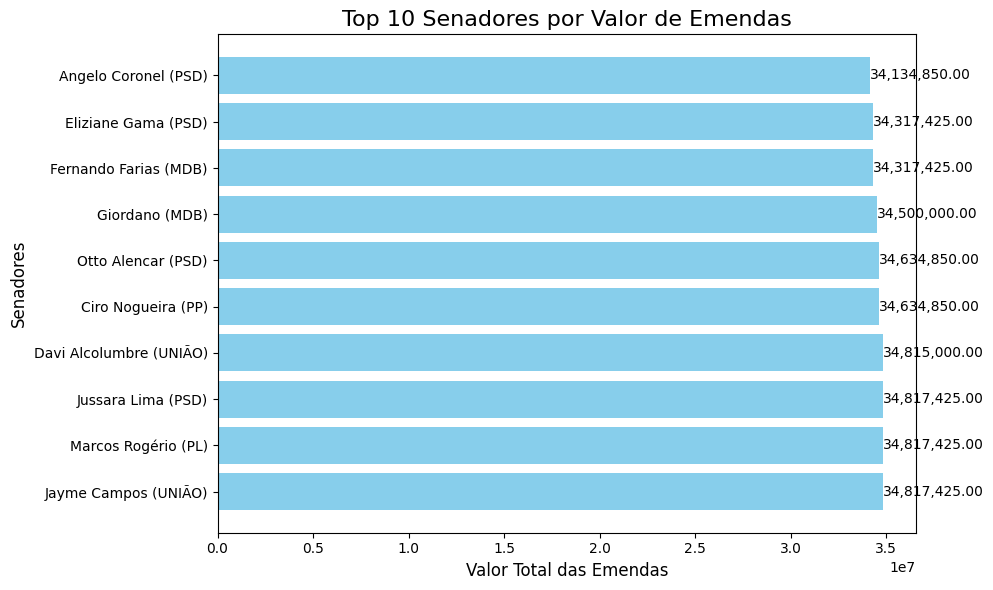

In [40]:
# Criando o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
# Converting the MultiIndex to string labels
y_labels = df_emendas_senadores.index.map(lambda x: f'{x[0]} ({x[1]})')
plt.barh(y_labels,
         df_emendas_senadores.values,
         color='skyblue')

# Adicionando título e rótulos aos eixos
plt.title('Top 10 Senadores por Valor de Emendas', fontsize=16)
plt.xlabel('Valor Total das Emendas', fontsize=12)
plt.ylabel('Senadores', fontsize=12)

# Exibindo os valores nas barras
for index, value in enumerate(df_emendas_senadores.values):
    plt.text(value, index, f'{value:,.2f}', va='center', fontsize=10)

# Ajustando o layout
plt.tight_layout()

# Exibindo o gráfico
plt.show()

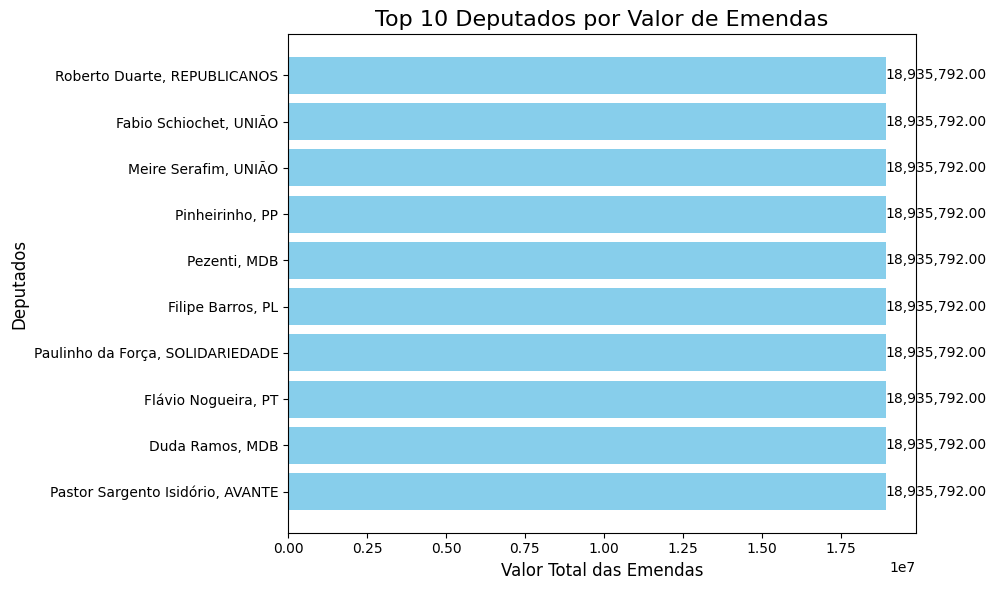

In [42]:
# Criando o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
# Convert the MultiIndex to a list of strings
y_labels = [', '.join(map(str, item)) for item in df_emendas_deputados.index]
plt.barh(y_labels,
         df_emendas_deputados.values,
         color='skyblue')

# Adicionando título e rótulos aos eixos
plt.title('Top 10 Deputados por Valor de Emendas', fontsize=16)
plt.xlabel('Valor Total das Emendas', fontsize=12)
plt.ylabel('Deputados', fontsize=12)

# Exibindo os valores nas barras
# Note: Using len(y_labels) ensures we iterate through the correct number of bars
for index, value in enumerate(df_emendas_deputados.values):
    plt.text(value, index, f'{value:,.2f}', va='center', fontsize=10)

# Ajustando o layout
plt.tight_layout()

# Exibindo o gráfico
plt.show()